## API

Today, we'll continue with the dictionaries lecture from last week.
one of the most popular forms of python dictionaries you'll run across as you work is __JSON__ ([JavaScript Object Notation](https://www.json.org/json-en.html)). JSON is the primary format in which data is passed back and forth to APIs ([Application Programming Interface](https://medium.com/@perrysetgo/what-exactly-is-an-api-69f36968a41f)), and most API servers will send their responses in JSON format. Python has great JSON support, with the json package. We'll play around with a snippet of a call result from the [MET Museum API]('https://metmuseum.github.io/').

In [4]:
# import requests and json - needed to make an API call
import requests
import json

In [5]:
# this is the api endpoint to get a JSON of each department info
dept_api_url = 'https://collectionapi.metmuseum.org/public/collection/v1/departments'

In [6]:
# calling the API with requests
response = requests.get(dept_api_url)
# creating a variable called data to hold the json formatted result
department_data = response.json()

In [7]:
print(type(department_data))
department_data

<class 'dict'>


{'departments': [{'departmentId': 1,
   'displayName': 'American Decorative Arts'},
  {'departmentId': 3, 'displayName': 'Ancient Near Eastern Art'},
  {'departmentId': 4, 'displayName': 'Arms and Armor'},
  {'departmentId': 5,
   'displayName': 'Arts of Africa, Oceania, and the Americas'},
  {'departmentId': 6, 'displayName': 'Asian Art'},
  {'departmentId': 7, 'displayName': 'The Cloisters'},
  {'departmentId': 8, 'displayName': 'The Costume Institute'},
  {'departmentId': 9, 'displayName': 'Drawings and Prints'},
  {'departmentId': 10, 'displayName': 'Egyptian Art'},
  {'departmentId': 11, 'displayName': 'European Paintings'},
  {'departmentId': 12,
   'displayName': 'European Sculpture and Decorative Arts'},
  {'departmentId': 13, 'displayName': 'Greek and Roman Art'},
  {'departmentId': 14, 'displayName': 'Islamic Art'},
  {'departmentId': 15, 'displayName': 'The Robert Lehman Collection'},
  {'departmentId': 16, 'displayName': 'The Libraries'},
  {'departmentId': 17, 'displayName

In [8]:
# from the JSON above we only need the list with all department "dictionaries" in them
# we'll store this in a variable called departments
departments = department_data['departments']
departments

[{'departmentId': 1, 'displayName': 'American Decorative Arts'},
 {'departmentId': 3, 'displayName': 'Ancient Near Eastern Art'},
 {'departmentId': 4, 'displayName': 'Arms and Armor'},
 {'departmentId': 5,
  'displayName': 'Arts of Africa, Oceania, and the Americas'},
 {'departmentId': 6, 'displayName': 'Asian Art'},
 {'departmentId': 7, 'displayName': 'The Cloisters'},
 {'departmentId': 8, 'displayName': 'The Costume Institute'},
 {'departmentId': 9, 'displayName': 'Drawings and Prints'},
 {'departmentId': 10, 'displayName': 'Egyptian Art'},
 {'departmentId': 11, 'displayName': 'European Paintings'},
 {'departmentId': 12, 'displayName': 'European Sculpture and Decorative Arts'},
 {'departmentId': 13, 'displayName': 'Greek and Roman Art'},
 {'departmentId': 14, 'displayName': 'Islamic Art'},
 {'departmentId': 15, 'displayName': 'The Robert Lehman Collection'},
 {'departmentId': 16, 'displayName': 'The Libraries'},
 {'departmentId': 17, 'displayName': 'Medieval Art'},
 {'departmentId': 

In [9]:
# once we have the department information, we can examine how many objects there are in 
# total for a particular department.
# this api endpoint also provides a list of object ids which we'll use later to get images
# here we are examining the first department, which is American Decorative Arts
obj_by_dept_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects?departmentIds=" + str(1) + '&q=cat'
response = requests.get(obj_by_dept_url)
obj_data = response.json()
print(obj_data)

{'total': 18244, 'objectIDs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 154, 165, 166, 170, 171, 172, 173, 174, 176, 177, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 243, 244, 245, 246, 247, 248, 249, 252, 253,

In [10]:
# we can get the info for all the departments by looping
for department in departments:
    department_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects?departmentIds=" + str(department['departmentId']) + '&q=cat'
    response = requests.get(department_url)
    data = response.json()
    print(data)

{'total': 18244, 'objectIDs': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 56, 57, 58, 59, 62, 63, 64, 65, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 150, 151, 154, 165, 166, 170, 171, 172, 173, 174, 176, 177, 179, 180, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 198, 199, 200, 201, 202, 203, 204, 205, 206, 208, 209, 211, 212, 213, 214, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 243, 244, 245, 246, 247, 248, 249, 252, 253,

{'total': 6190, 'objectIDs': [321733, 321734, 321735, 321736, 321737, 321738, 321739, 321740, 321741, 321742, 321743, 321744, 321745, 321746, 321747, 321748, 321749, 321750, 321751, 321752, 321753, 321754, 321755, 321756, 321757, 321758, 321759, 321760, 321761, 321762, 321763, 321764, 321765, 321766, 321767, 321768, 321769, 321770, 321771, 321772, 321773, 321774, 321775, 321776, 321777, 321778, 321779, 321780, 321781, 321782, 321783, 321784, 321785, 321786, 321787, 321788, 321789, 321790, 321791, 321792, 321793, 321794, 321795, 321796, 321797, 321798, 321799, 321800, 321801, 321802, 321803, 321804, 321805, 321806, 321807, 321808, 321809, 321810, 321811, 321812, 321813, 321814, 321816, 321817, 321818, 321819, 321820, 321821, 321822, 321823, 321824, 321825, 321826, 321827, 321828, 321829, 321830, 321831, 321832, 321833, 321834, 321835, 321836, 321837, 321838, 321839, 321840, 321841, 321842, 321843, 321844, 321845, 321846, 321847, 321848, 321849, 321850, 321851, 321852, 321853, 321854, 32

{'total': 13584, 'objectIDs': [22147, 22149, 22150, 22152, 22153, 22154, 22155, 22156, 22157, 22158, 22159, 22160, 22161, 22162, 22163, 22164, 22165, 22166, 22167, 22168, 22169, 22170, 22171, 22172, 22173, 22174, 22175, 22176, 22177, 22179, 22180, 22181, 22182, 22183, 22184, 22185, 22186, 22187, 22188, 22189, 22190, 22191, 22192, 22193, 22194, 22195, 22196, 22197, 22198, 22199, 22200, 22201, 22202, 22203, 22204, 22205, 22206, 22207, 22208, 22209, 22210, 22211, 22212, 22213, 22214, 22215, 22216, 22217, 22218, 22219, 22220, 22221, 22222, 22223, 22224, 22225, 22226, 22227, 22228, 22229, 22230, 22231, 22232, 22233, 22234, 22235, 22236, 22237, 22238, 22239, 22240, 22241, 22242, 22243, 22244, 22245, 22246, 22247, 22248, 22250, 22251, 22252, 22253, 22255, 22256, 22257, 22258, 22259, 22260, 22261, 22262, 22263, 22264, 22265, 22266, 22267, 22268, 22269, 22270, 22271, 22272, 22273, 22274, 22275, 22276, 22277, 22278, 22279, 22280, 22281, 22282, 22283, 22284, 22285, 22286, 22287, 22288, 22289, 222

{'total': 12317, 'objectIDs': [80406, 80407, 85432, 85442, 85557, 85558, 85564, 85567, 85569, 85570, 85571, 85572, 85574, 85576, 85580, 85581, 85582, 85584, 85585, 85591, 85593, 85594, 85672, 85673, 85674, 85675, 85678, 85679, 85681, 85682, 85684, 85685, 85687, 85688, 85689, 85690, 85691, 85692, 85694, 85695, 85697, 85698, 85699, 85703, 85704, 85705, 85706, 85709, 85710, 85712, 85714, 85715, 85717, 85718, 85719, 130776, 134609, 134610, 307989, 307990, 307991, 307992, 307993, 307994, 307995, 307996, 307997, 307998, 307999, 308000, 308001, 308002, 308003, 308004, 308005, 308006, 308007, 308008, 308009, 308010, 308011, 308012, 308013, 308014, 308015, 308016, 308017, 308018, 308019, 308020, 308021, 308022, 308023, 308024, 308025, 308026, 308027, 308028, 308029, 308030, 308031, 308032, 308033, 308034, 308035, 308036, 308037, 308038, 308039, 308040, 308041, 308042, 308043, 308044, 308045, 308046, 308047, 308048, 308049, 308050, 308051, 308052, 308053, 308054, 308055, 308056, 308057, 308058, 

{'total': 36460, 'objectIDs': [35966, 35967, 35968, 35969, 35970, 35971, 35972, 35973, 35974, 35975, 35976, 35977, 35978, 35979, 35980, 35981, 35982, 35983, 35984, 35985, 35986, 35987, 35988, 35989, 35990, 35991, 35992, 35993, 35994, 35995, 35996, 35997, 35998, 35999, 36000, 36001, 36002, 36003, 36004, 36005, 36006, 36007, 36008, 36009, 36010, 36011, 36012, 36013, 36014, 36015, 36016, 36017, 36018, 36019, 36020, 36021, 36022, 36023, 36024, 36025, 36026, 36027, 36028, 36029, 36030, 36031, 36032, 36033, 36034, 36035, 36036, 36037, 36038, 36039, 36040, 36041, 36042, 36043, 36044, 36045, 36046, 36047, 36048, 36049, 36050, 36051, 36052, 36053, 36054, 36055, 36056, 36057, 36058, 36059, 36060, 36061, 36062, 36063, 36064, 36065, 36066, 36067, 36068, 36069, 36070, 36071, 36072, 36073, 36075, 36076, 36077, 36078, 36079, 36080, 36081, 36082, 36083, 36084, 36085, 36086, 36087, 36088, 36089, 36090, 36091, 36092, 36093, 36094, 36095, 36096, 36098, 36099, 36100, 36101, 36102, 36103, 36104, 36105, 361

{'total': 2343, 'objectIDs': [466115, 466119, 466127, 466173, 466178, 466182, 466187, 466190, 466191, 466192, 466193, 466194, 466195, 466196, 466197, 466198, 466199, 466200, 466201, 466202, 466203, 466204, 466221, 466228, 466229, 466230, 466231, 466232, 466240, 466246, 466254, 466256, 466257, 466268, 466269, 466282, 466283, 466284, 466287, 466290, 466291, 466292, 466293, 466553, 466588, 466589, 466590, 466591, 466592, 466593, 466594, 466595, 466597, 466598, 466599, 466600, 466601, 466603, 466604, 466605, 466606, 466613, 466633, 466648, 466649, 466650, 466651, 466652, 471468, 471550, 471551, 471552, 471553, 471554, 471555, 471556, 471557, 471558, 471559, 471560, 471561, 471562, 471563, 471564, 471565, 471566, 471567, 471568, 471569, 471570, 471571, 471572, 471573, 471574, 471575, 471576, 471577, 471578, 471579, 471580, 471581, 471582, 471583, 471584, 471585, 471586, 471587, 471588, 471589, 471590, 471591, 471592, 471593, 471594, 471595, 471596, 471597, 471598, 471599, 471600, 471601, 47

{'total': 31272, 'objectIDs': [79440, 79441, 79442, 79443, 79444, 79445, 79446, 79447, 79448, 79449, 79450, 79451, 79452, 79453, 79454, 79455, 79456, 79457, 79458, 79459, 79460, 79461, 79462, 79463, 79464, 79465, 79466, 79467, 79468, 79469, 79470, 79471, 79472, 79473, 79474, 79475, 79476, 79477, 79478, 79479, 79480, 79481, 79482, 79484, 79485, 79486, 79487, 79488, 79489, 79490, 79492, 79493, 79494, 79495, 79496, 79497, 79498, 79499, 79500, 79501, 79502, 79503, 79504, 79505, 79506, 79507, 79508, 79509, 79510, 79511, 79512, 79513, 79514, 79515, 79516, 79517, 79518, 79519, 79520, 79521, 79522, 79523, 79524, 79525, 79526, 79527, 79528, 79529, 79530, 79531, 79532, 79533, 79534, 79535, 79536, 79537, 79538, 79539, 79540, 79541, 79542, 79543, 79544, 79545, 79546, 79547, 79548, 79549, 79550, 79552, 79553, 79554, 79555, 79556, 79557, 79558, 79559, 79561, 79566, 79568, 79569, 79570, 79571, 79572, 79573, 79574, 79575, 79576, 79578, 79579, 79580, 79581, 79582, 79584, 79585, 79586, 79587, 79588, 795

{'total': 166151, 'objectIDs': [333768, 333769, 333770, 333771, 333772, 333773, 333774, 333775, 333776, 333777, 333778, 333779, 333780, 333781, 333782, 333783, 333784, 333785, 333786, 333787, 333788, 333789, 333790, 333791, 333792, 333793, 333794, 333795, 333796, 333797, 333798, 333799, 333800, 333801, 333802, 333803, 333804, 333805, 333806, 333807, 333808, 333809, 333810, 333811, 333812, 333813, 333814, 333815, 333816, 333817, 333818, 333819, 333820, 333821, 333822, 333823, 333824, 333825, 333826, 333827, 333828, 333829, 333830, 333831, 333832, 333833, 333834, 333835, 333836, 333837, 333838, 333839, 333840, 333841, 333842, 333843, 333844, 333845, 333846, 333847, 333848, 333849, 333850, 333851, 333852, 333853, 333854, 333855, 333856, 333857, 333858, 333859, 333860, 333861, 333862, 333863, 333864, 333865, 333866, 333867, 333868, 333869, 333870, 333871, 333872, 333873, 333874, 333875, 333876, 333877, 333878, 333879, 333880, 333881, 333882, 333883, 333884, 333885, 333886, 333887, 333888, 

{'total': 27606, 'objectIDs': [543897, 543898, 543899, 543900, 543901, 543902, 543903, 543904, 543905, 543906, 543907, 543908, 543909, 543910, 543911, 543912, 543913, 543914, 543915, 543916, 543917, 543918, 543919, 543920, 543921, 543922, 543923, 543924, 543925, 543926, 543927, 543928, 543929, 543930, 543931, 543932, 543933, 543934, 543935, 543936, 543937, 543938, 543939, 543940, 543941, 543942, 543943, 543944, 543945, 543946, 543947, 543948, 543949, 543950, 543951, 543952, 543953, 543954, 543955, 543956, 543957, 543958, 543959, 543960, 543961, 543962, 543963, 543964, 543965, 543966, 543967, 543968, 543969, 543970, 543971, 543972, 543973, 543974, 543975, 543976, 543977, 543978, 543979, 543980, 543981, 543982, 543983, 543984, 543985, 543986, 543987, 543988, 543989, 543990, 543991, 543992, 543993, 543994, 543995, 543996, 543997, 543998, 543999, 544001, 544002, 544003, 544004, 544005, 544006, 544007, 544008, 544009, 544010, 544011, 544012, 544013, 544014, 544015, 544016, 544017, 544018, 5

{'total': 2610, 'objectIDs': [436199, 436200, 436201, 436202, 436203, 436205, 436206, 436207, 436208, 436209, 436210, 436211, 436212, 436213, 436214, 436215, 436216, 436217, 436219, 436220, 436221, 436222, 436223, 436224, 436225, 436226, 436227, 436228, 436229, 436230, 436233, 436234, 436235, 436236, 436238, 436239, 436240, 436241, 436242, 436243, 436244, 436245, 436246, 436248, 436252, 436253, 436254, 436255, 436256, 436257, 436258, 436259, 436260, 436261, 436262, 436263, 436264, 436265, 436266, 436267, 436268, 436269, 436270, 436271, 436272, 436273, 436274, 436275, 436277, 436278, 436279, 436280, 436281, 436282, 436283, 436284, 436286, 436287, 436288, 436289, 436290, 436291, 436292, 436293, 436294, 436295, 436296, 436297, 436298, 436299, 436300, 436301, 436302, 436305, 436306, 436307, 436309, 436310, 436311, 436312, 436314, 436315, 436316, 436317, 436318, 436319, 436320, 436321, 436322, 436323, 436324, 436325, 436326, 436327, 436328, 436329, 436330, 436331, 436332, 436333, 436334, 43

{'total': 42875, 'objectIDs': [82644, 90540, 90542, 90543, 156385, 156402, 156406, 156497, 156536, 185835, 185836, 185837, 185838, 185839, 185840, 185841, 185842, 185843, 185844, 185845, 185846, 185847, 185848, 185849, 185850, 185851, 185852, 185853, 185854, 185855, 185856, 185857, 185858, 185859, 185860, 185861, 185862, 185863, 185864, 185865, 185866, 185867, 185868, 185869, 185870, 185871, 185872, 185873, 185874, 185875, 185876, 185877, 185878, 185879, 185880, 185881, 185882, 185883, 185884, 185885, 185886, 185887, 185888, 185889, 185890, 185891, 185892, 185893, 185894, 185895, 185898, 185899, 185900, 185901, 185902, 185904, 185905, 185906, 185907, 185908, 185909, 185910, 185911, 185912, 185913, 185914, 185915, 185916, 185917, 185918, 185919, 185920, 185921, 185922, 185923, 185924, 185925, 185926, 185927, 185928, 185930, 185931, 185932, 185933, 185934, 185935, 185936, 185937, 185938, 185939, 185940, 185941, 185942, 185943, 185944, 185945, 185946, 185947, 185948, 185949, 185950, 18595

{'total': 33681, 'objectIDs': [239927, 239928, 239929, 239930, 239931, 239932, 239933, 239934, 239935, 239936, 239937, 239938, 239939, 239940, 239941, 239942, 239943, 239944, 239945, 239946, 239948, 239949, 239950, 239951, 239952, 239953, 239954, 239955, 239956, 239957, 239958, 239959, 239960, 239961, 239962, 239963, 239964, 239965, 239966, 239967, 239968, 239969, 239970, 239971, 239972, 239973, 239974, 239975, 239976, 239977, 239978, 239979, 239980, 239981, 239983, 239984, 239985, 239986, 239987, 239988, 239989, 239990, 239991, 239992, 239993, 239994, 239995, 239996, 239997, 239998, 239999, 240000, 240001, 240002, 240003, 240004, 240005, 240006, 240007, 240008, 240009, 240010, 240011, 240012, 240013, 240014, 240015, 240016, 240017, 240018, 240019, 240020, 240021, 240022, 240023, 240024, 240025, 240026, 240027, 240028, 240029, 240030, 240031, 240032, 240033, 240034, 240035, 240036, 240037, 240038, 240039, 240040, 240041, 240042, 240043, 240044, 240045, 240046, 240047, 240048, 240049, 2

{'total': 15290, 'objectIDs': [38638, 82690, 82691, 82693, 82694, 82695, 82701, 83194, 86116, 86122, 86123, 86124, 86125, 86126, 86127, 86128, 86131, 86132, 86133, 86134, 86136, 86167, 86169, 86171, 86173, 86174, 86175, 86176, 86177, 86178, 86179, 86180, 86182, 86183, 86185, 86186, 86187, 86188, 86189, 86190, 86191, 86195, 86197, 86204, 86216, 86219, 86223, 86239, 86240, 86241, 86242, 86243, 86244, 86246, 86247, 86248, 86249, 86250, 86251, 86252, 86253, 86254, 86255, 86256, 86261, 86262, 86263, 86264, 86265, 86266, 86267, 86268, 86269, 86270, 86271, 86272, 86273, 86274, 86275, 86276, 86277, 86278, 86280, 86541, 86542, 86543, 86544, 86545, 86546, 86547, 86548, 86549, 86550, 86551, 86552, 86554, 86555, 86556, 86557, 86558, 86559, 86560, 86562, 86563, 86564, 86565, 86566, 86567, 86569, 86570, 86571, 86572, 113786, 125688, 125689, 125690, 125691, 125692, 125694, 125695, 125696, 126486, 126488, 126489, 126601, 126606, 126607, 126608, 126609, 126610, 126611, 126612, 126613, 126614, 126615, 1

{'total': 2586, 'objectIDs': [459366, 459367, 459368, 459369, 459370, 459371, 459372, 459373, 459374, 459375, 459376, 459377, 459378, 459379, 459380, 459381, 459382, 459383, 459384, 459385, 459386, 459387, 459388, 459389, 459390, 459391, 459392, 459393, 459394, 459395, 459396, 459397, 459398, 459399, 459400, 459401, 459402, 459403, 459404, 459405, 459406, 459407, 459408, 459409, 459410, 459411, 459412, 459413, 459414, 459415, 459416, 459417, 459418, 459419, 459420, 459421, 459422, 459423, 459424, 459425, 459426, 459427, 459428, 459429, 459430, 459431, 459432, 459433, 459434, 459435, 459436, 459437, 459438, 459439, 459440, 459441, 459442, 459443, 459444, 459445, 459446, 459447, 459448, 459449, 459450, 459451, 459452, 459453, 459454, 459455, 459456, 459457, 459458, 459459, 459460, 459461, 459462, 459463, 459464, 459465, 459466, 459467, 459468, 459469, 459470, 459471, 459472, 459473, 459474, 459475, 459476, 459477, 459478, 459479, 459480, 459481, 459482, 459483, 459484, 459485, 459486, 45

{'total': 287, 'objectIDs': [681349, 681357, 681372, 681384, 681386, 681388, 681389, 681502, 681504, 681534, 681545, 681546, 681547, 681551, 681554, 681556, 681559, 681563, 681573, 682010, 682011, 682012, 682013, 682014, 682015, 698851, 707455, 716639, 716648, 751309, 811179, 811180, 811182, 811186, 815475, 824357, 832526, 832540, 832541, 832542, 839136, 839161, 839164, 839168, 839174, 839178, 839182, 839191, 839192, 839804, 839820, 839824, 591824, 591825, 591826, 591827, 591828, 591829, 591830, 591831, 591832, 591833, 591834, 591835, 591836, 591837, 591838, 591839, 591840, 591841, 591842, 591843, 591844, 591845, 591846, 591847, 591848, 591849, 591850, 591851, 591852, 591853, 591854, 591855, 591856, 591857, 591858, 591859, 591860, 591861, 591862, 591863, 591864, 591865, 591867, 591868, 591869, 591870, 591871, 591872, 591873, 680318, 680379, 702543, 705638, 706047, 738463, 738466, 738516, 738758, 738765, 756894, 769306, 769368, 769372, 769373, 769387, 812492, 821386, 821397, 821398, 821

{'total': 5201, 'objectIDs': [500526, 500527, 500528, 500529, 500530, 500531, 500532, 500533, 500534, 500535, 500536, 500537, 500538, 500539, 500540, 500541, 500542, 500543, 500544, 500547, 500548, 500549, 500550, 500551, 500552, 500553, 500554, 500555, 500557, 500558, 500559, 500560, 500561, 500562, 500563, 500564, 500565, 500566, 500567, 500568, 500569, 500570, 500571, 500572, 500573, 500574, 500575, 500576, 500577, 500578, 500579, 500580, 500581, 500582, 500583, 500584, 500585, 500586, 500587, 500588, 500589, 500590, 500591, 500592, 500593, 500594, 500595, 500596, 500597, 500598, 500599, 500600, 500601, 500602, 500603, 500604, 500605, 500606, 500607, 500608, 500609, 500610, 500611, 500612, 500613, 500614, 500615, 500616, 500617, 500618, 500619, 500620, 500621, 500622, 500623, 500624, 500625, 500626, 500627, 500628, 500629, 500630, 500631, 500632, 500633, 500634, 500635, 500636, 500637, 500638, 500639, 500642, 500643, 500644, 500645, 500646, 500647, 500648, 500649, 500650, 500651, 50

{'total': 36876, 'objectIDs': [260069, 260070, 260071, 260072, 260073, 260074, 260075, 260076, 260077, 260078, 260079, 260080, 260081, 260082, 260083, 260084, 260085, 260086, 260087, 260088, 260089, 260090, 260091, 260094, 260095, 260096, 260097, 260098, 260099, 260100, 260101, 260102, 260103, 260104, 260105, 260106, 260107, 260108, 260109, 260110, 260111, 260112, 260113, 260114, 260115, 260116, 260117, 260118, 260119, 260120, 260121, 260122, 260123, 260124, 260125, 260126, 260127, 260128, 260129, 260130, 260131, 260132, 260133, 260134, 260135, 260136, 260137, 260138, 260139, 260140, 260141, 260142, 260143, 260144, 260145, 260146, 260147, 260148, 260149, 260152, 260153, 260154, 260155, 260156, 260157, 260158, 260159, 260160, 260161, 260162, 260163, 260164, 260165, 260166, 260167, 260168, 260169, 260170, 260171, 260172, 260173, 260175, 260177, 260178, 260179, 260180, 260181, 260182, 260183, 260184, 260185, 260186, 260187, 260188, 260189, 260190, 260191, 260192, 260193, 260194, 260195, 2

{'total': 13928, 'objectIDs': [208019, 480257, 480258, 480259, 480260, 480261, 480262, 480263, 480264, 480265, 480266, 480267, 480268, 480269, 480270, 480271, 480272, 480273, 480274, 480275, 480276, 480277, 480278, 480279, 480280, 480281, 480282, 480283, 480284, 480285, 480286, 480287, 480288, 480289, 480290, 480291, 480292, 480293, 480294, 480295, 480296, 480297, 480298, 480299, 480300, 480301, 480302, 480303, 480304, 480305, 480306, 480307, 480308, 480309, 480310, 480311, 480312, 480313, 480314, 480315, 480316, 480317, 480318, 480319, 480320, 480321, 480322, 480323, 480324, 480325, 480326, 480327, 480328, 480329, 480330, 480331, 480332, 480333, 480334, 480335, 480336, 480337, 480338, 480339, 480340, 480341, 480342, 480343, 480344, 480345, 480346, 480347, 480348, 480349, 480350, 480351, 480352, 480353, 480354, 480355, 480356, 480357, 480358, 480359, 480360, 480361, 480362, 480363, 480364, 480365, 480366, 480367, 480368, 480369, 480370, 480371, 480372, 480373, 480374, 480375, 480376, 4

In [11]:
# we can create a list with objects per deparment so that the name of the department
# and the total number of objects are grouped together
dept_obj_total = []

for department in departments:
    obj = {}
    obj['title'] = department['displayName']
    dept_obj_total.append(obj)
    
    department_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects?departmentIds=" + str(department['departmentId']) + '&q=cat'
    response = requests.get(department_url)
    data = response.json()
    obj['total_objects'] = data['total']
    
print(dept_obj_total)

[{'title': 'American Decorative Arts', 'total_objects': 18244}, {'title': 'Ancient Near Eastern Art', 'total_objects': 6190}, {'title': 'Arms and Armor', 'total_objects': 13584}, {'title': 'Arts of Africa, Oceania, and the Americas', 'total_objects': 12317}, {'title': 'Asian Art', 'total_objects': 36460}, {'title': 'The Cloisters', 'total_objects': 2343}, {'title': 'The Costume Institute', 'total_objects': 31272}, {'title': 'Drawings and Prints', 'total_objects': 166151}, {'title': 'Egyptian Art', 'total_objects': 27606}, {'title': 'European Paintings', 'total_objects': 2610}, {'title': 'European Sculpture and Decorative Arts', 'total_objects': 42875}, {'title': 'Greek and Roman Art', 'total_objects': 33681}, {'title': 'Islamic Art', 'total_objects': 15290}, {'title': 'The Robert Lehman Collection', 'total_objects': 2586}, {'title': 'The Libraries', 'total_objects': 287}, {'title': 'Medieval Art', 'total_objects': 7151}, {'title': 'Musical Instruments', 'total_objects': 5201}, {'title'

### Let's visualize this data:

In [12]:
import matplotlib.pyplot as plt
import numpy as np

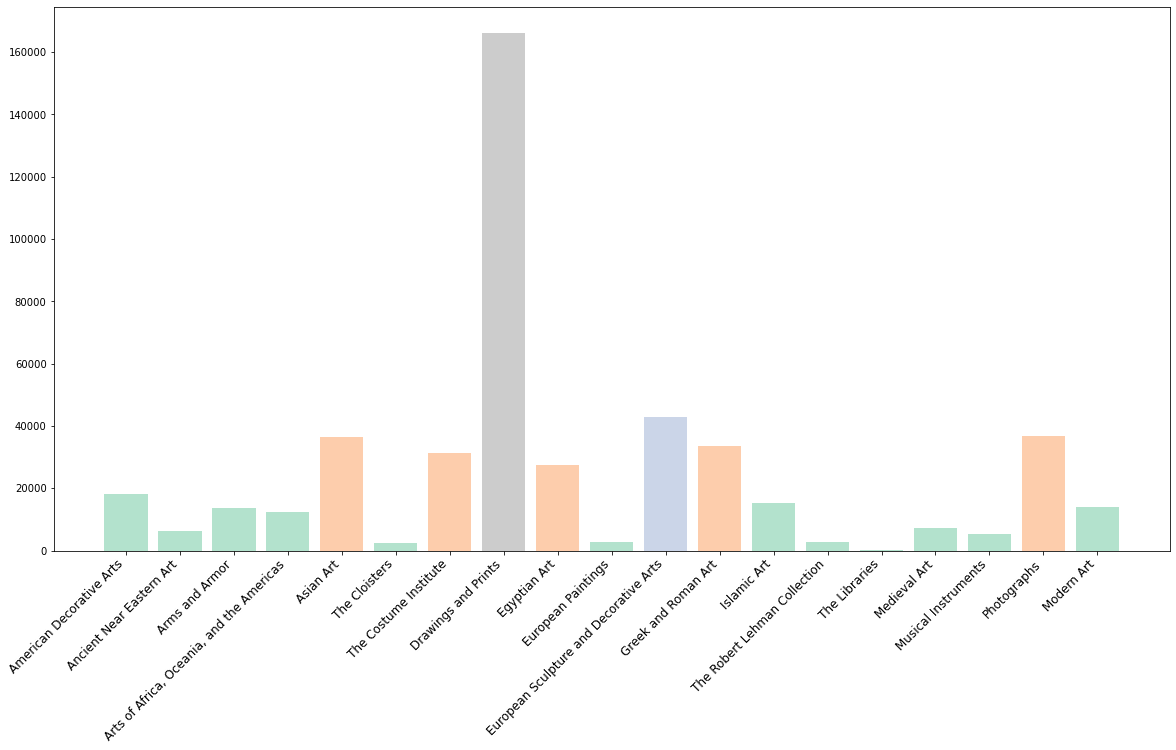

In [13]:
# plt takes in lists for x, y values
# getting a list of total # of objects per department for our y values
# and a list of all the department names for our x values
total_num = []
dept_names = []
for dept_obj in dept_obj_total:
    total_num.append(dept_obj['total_objects'])
    dept_names.append(dept_obj['title'])

# using numpy to calculate the color so it changes by bar height
y = np.array(total_num)    
my_cmap = plt.get_cmap("Pastel2")
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))

# setting the figure size
plt.figure(figsize=(20,10))
plt.bar(range(len(dept_obj_total)), total_num, color=my_cmap(rescale(y)), align="center")
plt.xticks(range(len(dept_obj_total)), dept_names, rotation=45, ha="right", fontsize=12)
plt.show()

### Inspecting images

In [14]:
# we are going to get images from {'departmentId': 11, 'displayName': 'European Paintings'}
# first we call the api endpoint for the objects
# and store the JSON response in a variable
ep_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects?departmentIds=" + str(11) + '&q=cat'
response = requests.get(ep_url)
ep_data = response.json()

In [15]:
# inspect our JSON data
ep_data

{'total': 2610,
 'objectIDs': [436199,
  436200,
  436201,
  436202,
  436203,
  436205,
  436206,
  436207,
  436208,
  436209,
  436210,
  436211,
  436212,
  436213,
  436214,
  436215,
  436216,
  436217,
  436219,
  436220,
  436221,
  436222,
  436223,
  436224,
  436225,
  436226,
  436227,
  436228,
  436229,
  436230,
  436233,
  436234,
  436235,
  436236,
  436238,
  436239,
  436240,
  436241,
  436242,
  436243,
  436244,
  436245,
  436246,
  436248,
  436252,
  436253,
  436254,
  436255,
  436256,
  436257,
  436258,
  436259,
  436260,
  436261,
  436262,
  436263,
  436264,
  436265,
  436266,
  436267,
  436268,
  436269,
  436270,
  436271,
  436272,
  436273,
  436274,
  436275,
  436277,
  436278,
  436279,
  436280,
  436281,
  436282,
  436283,
  436284,
  436286,
  436287,
  436288,
  436289,
  436290,
  436291,
  436292,
  436293,
  436294,
  436295,
  436296,
  436297,
  436298,
  436299,
  436300,
  436301,
  436302,
  436305,
  436306,
  436307,
  436309,
 

In [16]:
# we are going to look at the first 10 images
# we slice through from 0: 10 -> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9
# and store the 10 object ids in a variable
ep_objects = ep_data['objectIDs'][0: 10]
ep_objects

[436199,
 436200,
 436201,
 436202,
 436203,
 436205,
 436206,
 436207,
 436208,
 436209]

In [17]:
# let's see what a single object JSON looks like:
obj_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects/436199"
response = requests.get(obj_url)
obj_data = response.json()
obj_data

{'objectID': 436199,
 'isHighlight': False,
 'accessionNumber': '85.9',
 'accessionYear': '1885',
 'isPublicDomain': True,
 'primaryImage': 'https://images.metmuseum.org/CRDImages/ep/original/ep85.9.bw.R.jpg',
 'primaryImageSmall': 'https://images.metmuseum.org/CRDImages/ep/web-large/ep85.9.bw.R.jpg',
 'additionalImages': [],
 'constituents': [{'constituentID': 164214,
   'role': 'Artist',
   'name': 'Christian Wilhelm Ernst Dietrich',
   'constituentULAN_URL': 'http://vocab.getty.edu/page/ulan/500009500',
   'constituentWikidata_URL': 'https://www.wikidata.org/wiki/Q536581',
   'gender': ''}],
 'department': 'European Paintings',
 'objectName': 'Painting',
 'title': 'Christ Healing the Sick',
 'culture': '',
 'period': '',
 'dynasty': '',
 'reign': '',
 'portfolio': '',
 'artistRole': 'Artist',
 'artistPrefix': '',
 'artistDisplayName': 'Christian Wilhelm Ernst Dietrich',
 'artistDisplayBio': 'German, Weimar 1712–1774 Dresden',
 'artistSuffix': '',
 'artistAlphaSort': 'Dietrich, Chris

In [20]:
# now that we know that the images are in the primaryImage key, we are going to iterate through our list of 10
# image objects and store the urls in a new list
img_urls = []

for obj in ep_objects:
    # making an api call for each objectID
    obj_url = "https://collectionapi.metmuseum.org/public/collection/v1/objects/" + str(obj)
    response = requests.get(obj_url)
    obj_data = response.json()
    primaryimage_url = obj_data['primaryImage']
    # sometimes an object might not have a primaryImage URL. we don't want empty strings so let's filter those out
    if(primaryimage_url):
        img_urls.append(primaryimage_url)

img_urls

['https://images.metmuseum.org/CRDImages/ep/original/ep85.9.bw.R.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/ep71.162.bw.R.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/DP273092.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/57270.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/DT11667.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/DT10296.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/DP318275.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/DP123842.jpg',
 'https://images.metmuseum.org/CRDImages/ep/original/DP101529.jpg']

In [24]:
# we are importing the io module from scikit-image library
# https://scikit-image.org/
# scikit-image is a collection of algorithms for image processing.
# the io module gives us utilities to read and write images in various formats.
# we are also importing opencv. you'll get to learn more about this library this weekend
from skimage import io
import cv2

ModuleNotFoundError: No module named 'cv2'

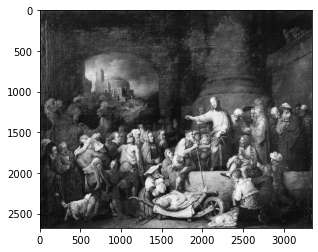

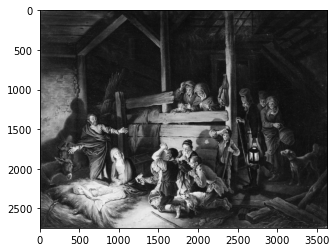

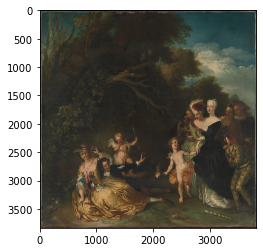

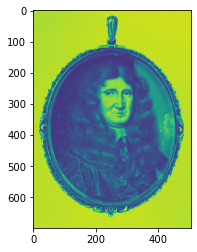

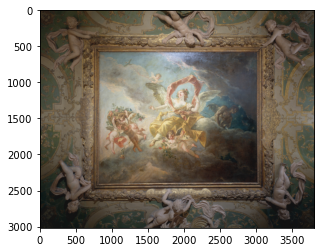

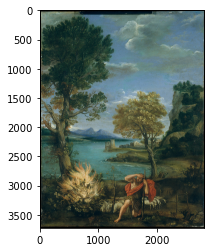

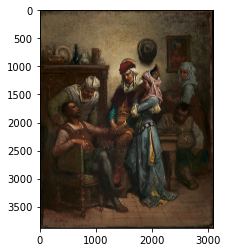

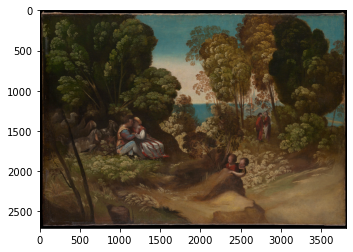

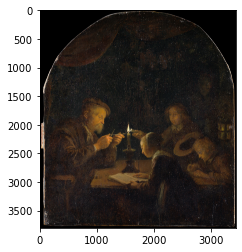

In [23]:
# see our images directly in the notebook
for index, url in enumerate(img_urls): # enumerate(list) gives us access to index numbers!
    image = io.imread(url) # using io.imread to get images from our url
    plt.imshow(image) # using matplotlib's imshow to read the images
    plt.show() # using plt.show to plot our images

In [ ]:
# see our images directly in the notebook with color correction
for index, url in enumerate(img_urls):
    if index == 3: # this particular image at index 3 has an BGR color layer, so we are using the COLOR_BGR2RGB method from cv2 to change it back to RGB
        image = io.imread(url)
        cc_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(cc_image)
    else:
        image = io.imread(url)
        plt.imshow(image)
    plt.show()

In [ ]:
# PIL, short for Python Imaging Library,is a free and open-source additional library
# that adds support for opening, manipulating, and saving many different image file formats.
# from Python's built in io library, we are importing Bytes.IO
# read more here: https://docs.python.org/3/library/io.html
from PIL import Image
from io import BytesIO

In [ ]:
# open in preview:
for url in img_urls:  
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.show()

In [ ]:
# download our images:
# first: create a folder named images
# we can use urllib to download the image urls: for opening and reading URLs
import urllib.request
# we want to add a sleeper to not get blocked 
import time 
import random

# Iterate over DataFrame rows as (index, row) pairs
for index, url in enumerate(img_urls):
    # Sets the file name as everything after the / and the end of the link
    file_name = url.split('/')[-1]
    print(file_name)
    # download our images
    urllib.request.urlretrieve(url, 'images/' + file_name)
    # adding random x second break in between each image so that the Met doesn't think we're hacking into their system
    time.sleep(random.randint(1, 5))

## Automation

In [ ]:
# we need to import two libraries for our automation task:
# 1. os -> This module provides a portable way of using operating system dependent functionality.
# 2. time -> This module provides various time-related functions.
import os
import time

### creating 100 files

We are using python to programmatically create 100 txt files in a folder called pages. this will need the os and time libraries, so make sure to run the cell above. have the pages folder open so you can see the files being created in real time!

In [ ]:
# you need to create a folder called pages in the directory you're working in
# this is where our txt files will be populated.
path = "./pages"

# this creates the pages that we want to work with.
# it assumes a pages folder exists within the same context as the notebook
for i in range(100): # 100 files get created
    page = i + 1 # i starts at 0 so we want to add 1 so our files are from 1 - 100 and not 0 - 99.
    # ./pages/page.txt
    # open() creates the file, write() creates the writing
    # close() saves and leaves the file
    f = open("./pages/" + str(page) + ".txt", "w+")
    f.write("This is page %s." % (page)  )
    f.write("\r\rThis is where your amazing writing will go.\r\r"  )
    f.write("This is the end of page %s." % (page)  )
    f.close()
    #this pauses execution for a specified time so you can watch it happen
    print(str(page) +'.txt has been created')
    time.sleep(0.25) # delay execution for .25 seconds

### creating the folders

Here we are creating folders to put all of the 100 files. we are creating 10 folders in total (e.g. 10, 20, 30, etc). we will then put the files in their respective folders by 10s.

In [ ]:
path = "./pages/"
textfiles = os.listdir(path)

#uncomment the following line to see
#print(textfiles) 

#This creates folders for 0 to 100 in increments of ten
for i in range(0,11):
    # i goes from 1 to 10 and we multply it by ten to make a consistent jump
    # we then use that value to create the directory we want to have
    directory = path + str(i * 10) # ./pages/10
    # check if the path exists
    if not os.path.exists(directory):
        # if not, then make the folder
        os.makedirs(directory)
    # report completion & delay for .3 seconds
    print(directory + " has been created!")
    time.sleep(.3)

### moving the files into the folders

Finally, we are going to move all of our txt files into their folders.

In [ ]:
# this is a method to take a path and split it into name and extension
def GetFilenameData(fullName):
    #split separates our file name into something specific
    fullnameSplit = fullName.split('.')
    #this split is actually naive and is broken with names that have two or
    #more . marks in them
    fileName = {
        'name': fullnameSplit[0],
        #this if statement is a Ternary operation that returns none if the
        #extension doesn't exist
        'extension': fullnameSplit[1] if (len(fullnameSplit) > 1) else None
    }
    return fileName


# get all the paths within the folder
path = "./pages/"
textfiles = os.listdir(path)


# check for all files within a certain range and move it into an appropriate folder
for file in textfiles:
    filenameData = GetFilenameData(file)
    #Make sure we aren't working with a folder
    if filenameData['extension'] is not None and filenameData['name'] is not '':
        #this 0,11 range is the same range we used to create the folders
        for i in range(0,11):
            if int(filenameData['name']) in range(i*10, (i+1)*10):
                os.rename(path+file, path + str(i*10) +"/" + file)
                # ./pages/filename.extension
                # ./pages/GroupedPages/filename.extension
                print("%s.%s has moved to /%s" % (filenameData['name'], filenameData['extension'], i * 10))
    time.sleep(.3)
    
''' This is the basic functionality of the for loop above
for file in textfiles:
    filenameData = GetFilenameData(file)
    if filenameData['extension'] in not None:
        if int(filenameData['name']) in range(0,10):
            #path + file is the current file path
            #path + "0/" + file is the new path we created
            os.rename(path+file, path + "0/" + file
'''